![dance party](dance_party.jpg)

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

## Executive summary


## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

## 💪 Challenge
Your task is to devise an analytically-backed, dance-themed playlist for the company's summer party. Your choices must be justified with a comprehensive report explaining your methodology and reasoning. Below are some suggestions on how you might want to start curating the playlist:
* Use descriptive statistics and data visualization techniques to explore the audio features and understand their relationships.
* Develop and apply a machine learning model that predicts a song's `danceability`. 
* Interpret the model outcomes and utilize your data-driven insights to curate your ultimate dance party playlist of the top 50 songs according to your model.

In [1]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.express as px
import missingno as msno

In [2]:
spotify = pd.read_csv('data/spotify.csv')
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

In [4]:
#Drop NaN values from the spotify dataset
spotify.dropna(inplace=True)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113026 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113026 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113026 non-null  int64  
 5   duration_ms       113026 non-null  float64
 6   explicit          113026 non-null  bool   
 7   danceability      113026 non-null  float64
 8   energy            113026 non-null  float64
 9   key               113026 non-null  int64  
 10  loudness          113026 non-null  float64
 11  mode              113026 non-null  int64  
 12  speechiness       113026 non-null  float64
 13  acousticness      113026 non-null  float64
 14  instrumentalness  113026 non-null  float64
 15  liveness          113026 non-null  float64
 16  valence           11

<AxesSubplot: >

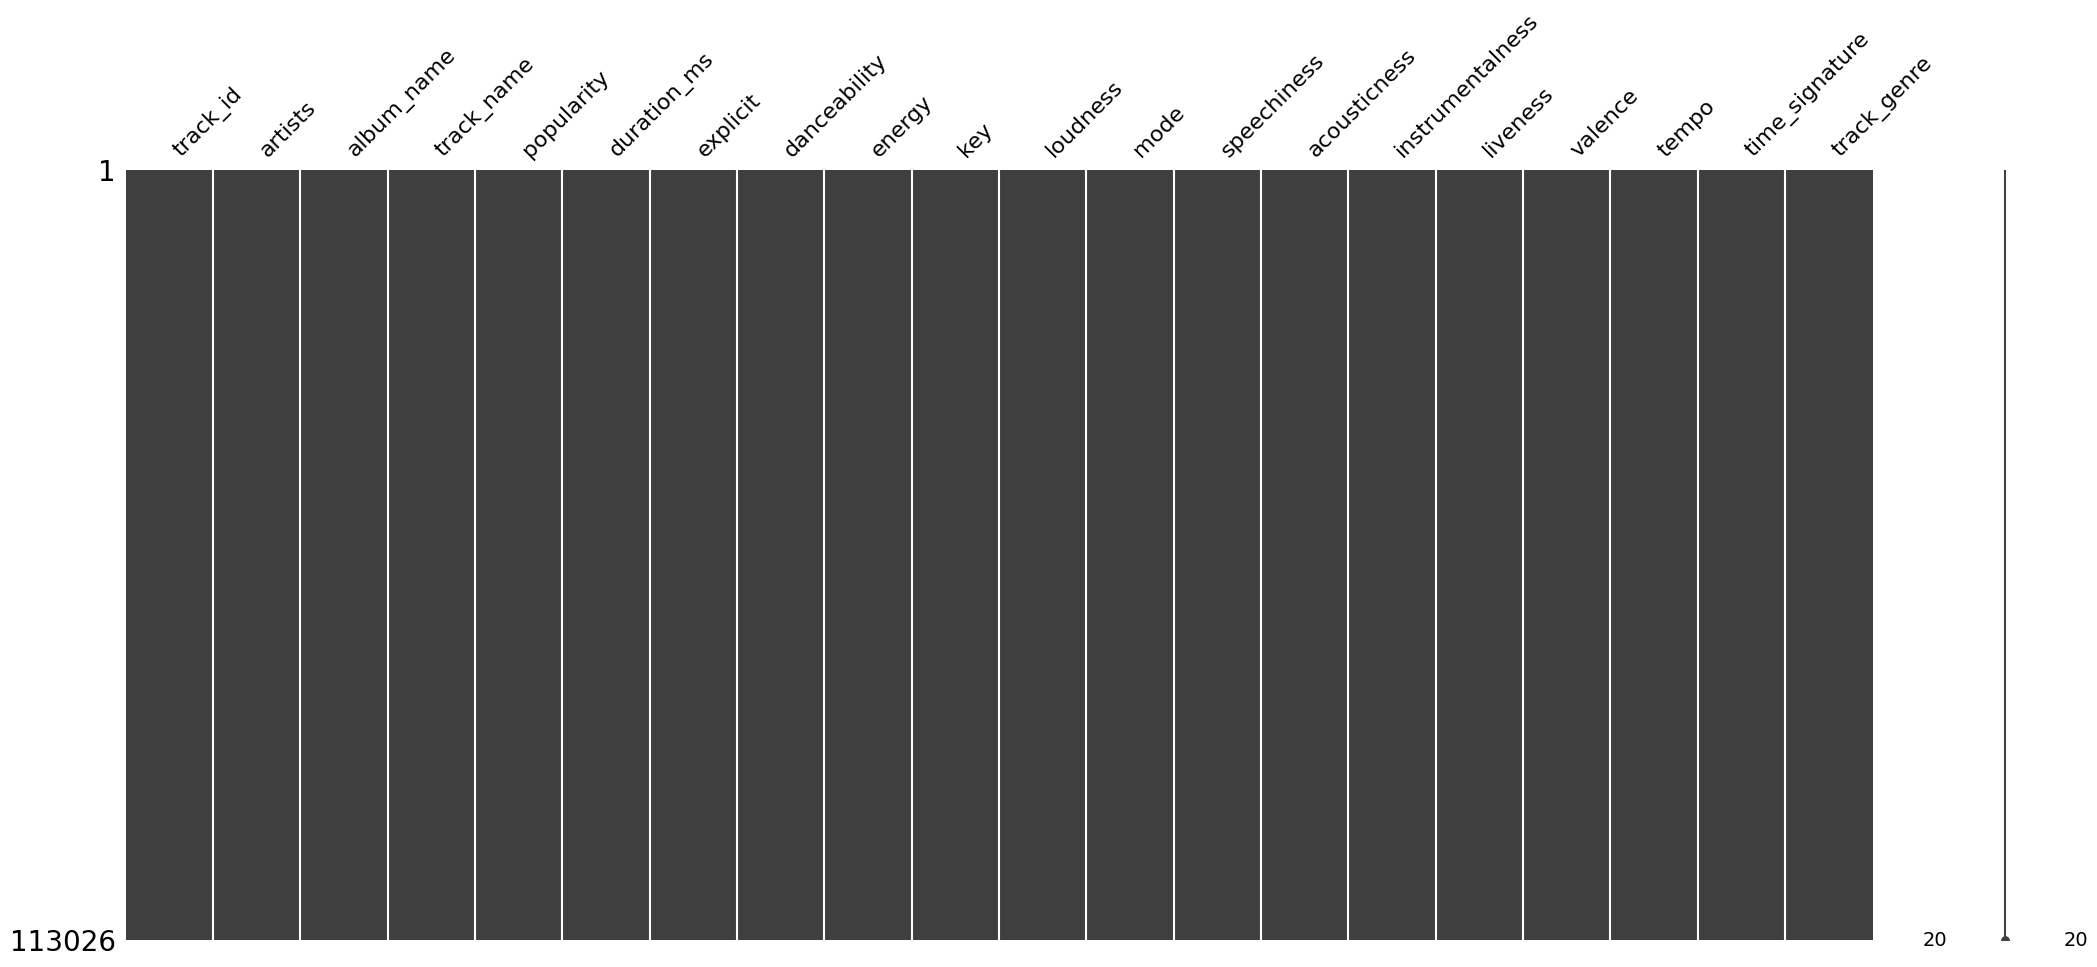

In [5]:
#Search for missing data
msno.matrix(spotify)

## Track id and Track name
After reviewing that there was no missing values, we find out that some of the songs have duplicates, more in detail by their genre and also the track name appears to have dupplicates. So now we will be dropin the duplicates and only conserve the first ones of both variables

In [6]:
# Find duplicates by track_id
spotify_duplicates = spotify[spotify.duplicated(subset=['track_id'], keep=False)].sort_values('track_id')
spotify_duplicates.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
14908,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320.0,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,chill
102298,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320.0,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,soul
2092,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973.0,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alt-rock
3242,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973.0,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alternative
91020,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973.0,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,rock


In [7]:
# Drop duplicates and keep the first one
spotify.drop_duplicates(subset='track_id', keep='first', inplace=True)
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
# Find duplicates by track_name
spotify_duplicates = spotify[spotify.duplicated(subset='track_name', keep=False)].sort_values('track_name')
spotify_duplicates.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
110443,03XMXPAE2Yx6HeqCpAPL5o,Kid Koala,Baby Driver (Music from the Motion Picture),"""Was He Slow?"" - Music From The Motion Picture...",25,106880.0,False,0.754,0.719,10,-5.806,0,0.3710,0.3730,0.259000,0.1200,0.674,175.990,4,trip-hop
110356,1Ffxfl1vuEDc0xBVPIQ50s,Kid Koala,"""Was He Slow?"" (Music From The Motion Picture ...","""Was He Slow?"" - Music From The Motion Picture...",37,106880.0,False,0.754,0.719,10,-5.806,0,0.3710,0.3730,0.259000,0.1200,0.674,175.990,4,trip-hop
60488,5y2cZBC8Mq4TQp2I6Vo0ne,#NAME?,#NAME?,#NAME?,32,247826.0,False,0.429,0.959,10,-3.214,1,0.0905,0.0370,0.000193,0.0474,0.651,158.031,4,j-idol
60491,4YFrH7oE7c35mJX3kAQbWb,#NAME?,全部、内緒。 (Special Edition),#NAME?,38,246546.0,False,0.415,0.963,10,-2.651,1,0.0952,0.0374,0.000222,0.0594,0.618,158.048,4,j-idol
70275,7DtuFvOjcJSFuCVeq3U7ns,吳青峰;Stefanie Sun,馬拉美的星期二,(......醉鬼阿Q)(feat. 孫燕姿),41,216399.0,False,0.586,0.790,7,-6.834,1,0.0453,0.0254,0.000761,0.1380,0.228,120.067,4,mandopop


In [9]:
# Drop duplicates and keep the first one
spotify.drop_duplicates(subset='track_name', keep='first', inplace=True)
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72935 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          72935 non-null  object 
 1   artists           72935 non-null  object 
 2   album_name        72935 non-null  object 
 3   track_name        72935 non-null  object 
 4   popularity        72935 non-null  int64  
 5   duration_ms       72935 non-null  float64
 6   explicit          72935 non-null  bool   
 7   danceability      72935 non-null  float64
 8   energy            72935 non-null  float64
 9   key               72935 non-null  int64  
 10  loudness          72935 non-null  float64
 11  mode              72935 non-null  int64  
 12  speechiness       72935 non-null  float64
 13  acousticness      72935 non-null  float64
 14  instrumentalness  72935 non-null  float64
 15  liveness          72935 non-null  float64
 16  valence           72935 non-null  float

In [11]:
# Select numeric variables
#numeric_vars = ['popularity', 'duration_ms', 'danceability', 'speechiness','acousticness', 'liveness', 'valence', 'tempo']

# Create pairplot
#sns.pairplot(spotify[numeric_vars])

## Artists

In [12]:
# Get the top 10 most common artist names
top_10_artists = spotify['artists'].value_counts().head(10)

# Create a bar chart
fig = px.bar(x=top_10_artists.index, y=top_10_artists.values)
fig.update_layout(
    title='Top 10 Most Common Artist Names',
    xaxis_title='Artist Name',
    yaxis_title='Count',
    xaxis_tickangle=-45
)
fig.show()

In [13]:
# Drop artist names who don't start with a letter 
spotify = spotify[spotify['artists'].str.match(r'^[a-zA-Z]')]
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Popularity

In [14]:
# Create a histogram for popularity
fig = px.histogram(spotify, x='popularity', nbins=20)
fig.update_layout(
    title='Popularity Distribution',
    xaxis_title='Popularity',
    yaxis_title='Count'
)
fig.show()


In [18]:
# Scale the popularity column from 0 to 1 
spotify['popularity'] = (spotify['popularity'] - spotify['popularity'].min()) / (spotify['popularity'].max() - spotify['popularity'].min())
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_sec
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,198.853


In [41]:
# Drop songs with popularity less than 0.6
spotify = spotify[spotify['popularity'] >= 0.6]
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_sec
3886,67IvfvAMYQzJEeHopvwMMW,Pharoahe Monch,Simon Says,Simon Says,0.64,173159.0,1,0.664,0.916,1,-3.888,1,0.473,0.170,0.000017,0.1640,0.559,93.134,4,alternative,2.885983,173.159
8328,2AxCeJ6PSsBYiTckM0HLY7,Jimi Hendrix,Electric Ladyland,Voodoo Child (Slight Return),0.68,313373.0,0,0.214,0.910,8,-6.662,1,0.389,0.477,0.008330,0.0517,0.448,175.549,4,blues,5.222883,313.373
14930,7es56D0QedGMsK39wl2yFX,ASTN,Happier Than Ever,Happier Than Ever,0.76,109325.0,1,0.667,0.457,6,-6.885,0,0.439,0.341,0.000000,0.1140,0.266,97.604,4,chill,1.822083,109.325
14941,2xhGZ3WzOa3tir28y7Cb88,Peachy!;mxmtoon,Falling for U,Falling for U,0.74,124000.0,0,0.719,0.360,6,-12.034,1,0.398,0.748,0.000002,0.0812,0.409,80.184,4,chill,2.066667,124.000
14967,3VOgOT6SNjrRjhjuisphY7,untrusted;pretence;11:11 Music Group,"eyes blue or brown, can't remember","eyes blue or brown, can't remember",0.66,180833.0,0,0.751,0.354,10,-14.518,1,0.446,0.885,0.179000,0.2060,0.781,143.870,4,chill,3.013883,180.833


## Duration     

In [20]:
# Convert duration_ms column to minutes
spotify['duration_min'] = spotify['duration_ms'] / 1000 / 60

# Sort the dataframe by duration_min in descending order
spotify_sorted = spotify.sort_values(by='duration_min', ascending=False)

# Drop the old duration_ms column
spotify_sorted.drop('duration_ms', axis=1, inplace=True)

# Display the top 5 rows
spotify_sorted.head(5)

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_sec
72988,3Cnz3Bu9Wcw8p3kiBTXTxp,Tale Of Us,Unity (Voyage Mix),Unity (Voyage Mix) Pt. 1,0.35,False,0.695,0.736,5,-11.371,0,0.0374,0.00399,0.860,0.0910,0.0509,124.001,4,minimal-techno,87.288250,5237.295
10835,0LBIf9EFHuxmuNig4JHGZo,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,Crossing Wires 002 - Continuous DJ Mix,0.11,False,0.697,0.632,1,-12.469,1,0.0451,0.00815,0.871,0.0998,0.1510,121.055,4,breakbeat,79.817100,4789.026
24099,6wypxnAvmv5zYewUX3VFDd,Seth Troxler,Seth Troxler - The Lab 03,The Lab 03 - Continuous DJ Mix Part 1,0.08,False,0.684,0.656,5,-11.163,0,0.0633,0.01910,0.848,0.1030,0.3010,123.180,4,detroit-techno,78.838367,4730.302
73210,6JbQr97EMFD2D3Ek6gxgt1,Loco Dice,Amnesia Ibiza - Underground 10,Amnesia Ibiza Underground 10 DJ Mix,0.17,False,0.783,0.728,10,-10.176,0,0.0612,0.00158,0.840,0.1580,0.1890,125.044,4,minimal-techno,76.064950,4563.897
13232,3gFme8BdfTtFHxKmuTnSbj,Mark Farina,House of OM (DJ Mix),House of Om - Mark Farina - Continuous Mix,0.11,False,0.861,0.805,11,-6.461,0,0.0711,0.00548,0.577,0.1350,0.5450,129.306,4,chicago-house,74.125333,4447.520


In [ ]:
# Drop songs with duration_min above 10
spotify = spotify[spotify['duration_min'] <= 10]

spotify.head()

## Explicit

In [23]:
# Convert explicit column to bool values
spotify['explicit'] = spotify['explicit'].astype(int)

# Convert explicit column to categorical variable
spotify['explicit'] = spotify['explicit'].astype('category')

spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_sec
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,230666.0,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,149610.0,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,210826.0,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,201933.0,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,198853.0,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,198.853


## Danceability

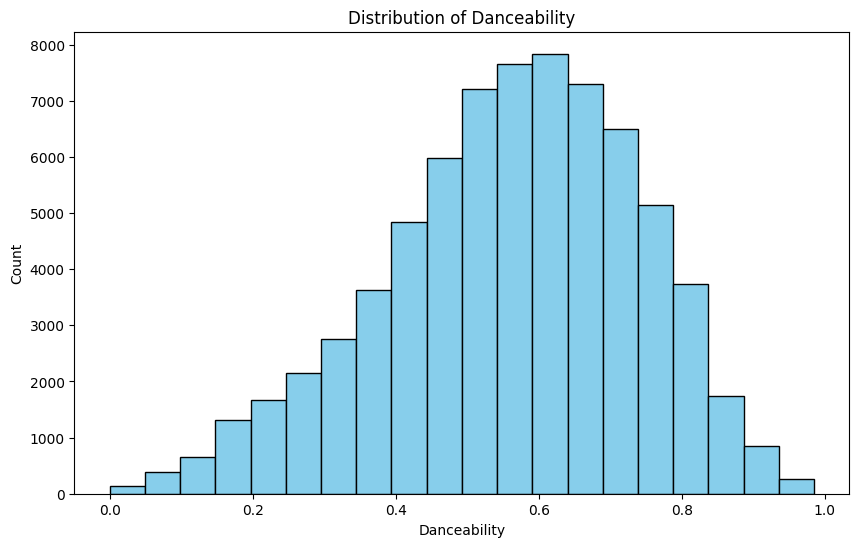

In [31]:
# Bar plot for danceabilit
plt.figure(figsize=(10, 6))
plt.hist(spotify['danceability'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.show()

In [27]:
# Sort the dataframe by danceability in descending order
spotify_sorted_danceability = spotify.sort_values(by='danceability', ascending=False)

# Display the top 20 rows
spotify_sorted_danceability.head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_sec
110673,4xKKIS9g9nivSiE7TtgR6V,Quantic,The Best of Quantic,Sol Clap,0.19,232853.0,0,0.985,0.651,9,-5.620,0,0.2170,0.001210,0.176000,0.0640,0.405,115.347,4,trip-hop,3.880883,232.853
65999,5kgT25LfYrXXMqNG2ia0O6,That Girl Lay Lay,Tha Cheat Code Reloaded,Medicaid Baby,0.10,199639.0,0,0.984,0.650,9,-3.915,1,0.0627,0.674000,0.005160,0.1330,0.910,117.995,4,kids,3.327317,199.639
72746,0VomrCFhqYNVuhfIRPLeVa,Oliver Schories,Fields Without Fences,Daily Routines,0.49,412133.0,0,0.982,0.478,5,-7.658,0,0.2020,0.118000,0.740000,0.1120,0.567,122.007,4,minimal-techno,6.868883,412.133
66211,2g1EQO48cbVQy3YEGAe7rS,Mixx Master Lee,The Mississippi Cha Cha Slide A.K.A. STOMP 2007,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",0.07,341933.0,0,0.981,0.675,0,-8.094,1,0.0810,0.029100,0.000000,0.1220,0.854,113.995,4,kids,5.698883,341.933
13241,4Y9XI2RRd9w2Ll0fYVBduE,dj funk,Dance Mania: Ghetto Madness,Bitches,0.10,162120.0,0,0.981,0.776,11,-7.288,0,0.2590,0.030700,0.000005,0.1850,0.727,128.106,4,chicago-house,2.702000,162.120
13033,2jJaGAIYHRqtESCMgTOlD5,Felix Da Housecat,He Was King,Plastik Fantastik,0.13,208626.0,0,0.980,0.454,7,-7.141,1,0.0637,0.031200,0.001740,0.0835,0.285,130.027,4,chicago-house,3.477100,208.626
12927,2UxAAEa5tZfv7O4NcR6gEN,DJ Pierre;My Digital Enemy;Hatiras,"Mono:Disko, Vol. 12",The Underground - Hatiras Remix,0.00,423344.0,0,0.979,0.517,8,-7.448,1,0.3030,0.000372,0.754000,0.0354,0.492,123.995,4,chicago-house,7.055733,423.344
14004,27iOGgZhoVyb7FWuukbwus,CoComelon,"CoComelon Kids Hits, Vol. 1",The Soccer Song (Football Song),0.49,170770.0,0,0.979,0.411,2,-12.780,1,0.0794,0.102000,0.000313,0.0729,0.879,123.979,4,children,2.846167,170.770
66195,1XGyurS0isZcUnRcilNGYh,Blake Rules;Netherfriends,Kids Trap 15,Peanut Butter,0.08,152000.0,0,0.978,0.419,9,-10.565,1,0.1290,0.395000,0.000000,0.0714,0.813,119.995,4,kids,2.533333,152.000
66057,0AaEbPXWdeiW6MbW80Eibj,Casper & Col'ta,The Slide Album,Casper Cha-Cha Slide (Live Platinum Band),0.10,387500.0,0,0.978,0.710,6,-5.131,1,0.2140,0.001450,0.000135,0.2980,0.455,122.020,4,kids,6.458333,387.500


## Speechiness

In [38]:
# Drop songs with speechiness below 0.33 and above 0.8
spotify = spotify[(spotify['speechiness'] >= 0.33) & (spotify['speechiness'] <= 0.66)]

spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_sec
762,1m3Lsbhkn6yL8apzsCiukd,Ben Woodward,Memories (Acoustic),Memories (Acoustic),0.46,183337.0,0,0.802,0.183,8,-17.100,1,0.403,0.809,0.0,0.1090,0.664,91.078,4,acoustic,3.055617,183.337
992,4Ds4bq6aqOSAp1T7DikOi4,Criolo,Ainda Há Tempo,Ainda Há Tempo,0.44,318360.0,0,0.580,0.800,6,-7.528,1,0.345,0.281,0.0,0.0708,0.483,81.303,4,afrobeat,5.306000,318.360
1003,0J4hFHpfCAlJOdrtcm04vz,Criolo,Ainda Há Tempo,Breaco,0.40,177240.0,0,0.619,0.781,1,-6.548,1,0.333,0.148,0.0,0.1830,0.728,182.026,4,afrobeat,2.954000,177.240
1005,7cAxwshLN1yidrBlDePrYW,Criolo,Ainda Há Tempo,É o Teste,0.41,279720.0,0,0.660,0.728,10,-6.177,0,0.337,0.178,0.0,0.0516,0.594,91.101,4,afrobeat,4.662000,279.720
1026,3A4Y4uYIIt7VoSugv1OELL,Criolo,Convoque Seu Buda,Plano de Voo,0.41,218880.0,0,0.571,0.690,8,-8.180,0,0.542,0.299,0.0,0.1030,0.228,155.991,4,afrobeat,3.648000,218.880


## Acousticness

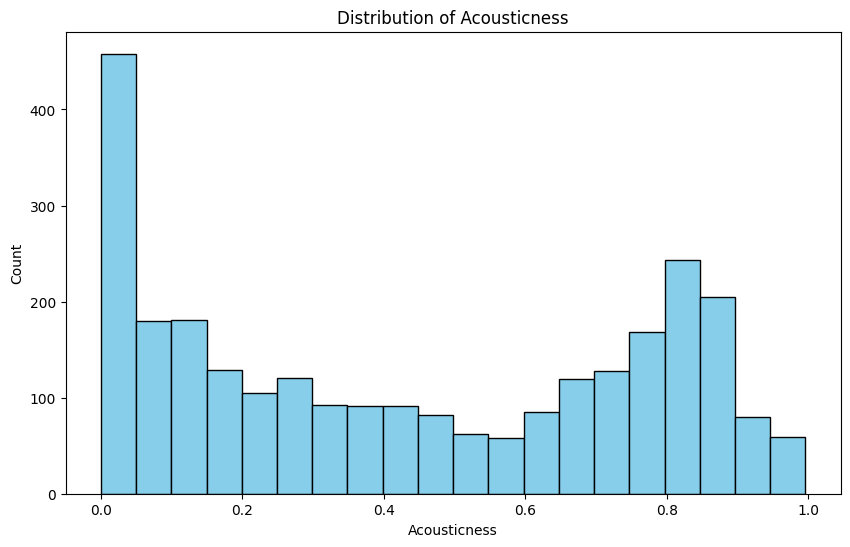

In [34]:
# Bar plot for acousticness
plt.figure(figsize=(10, 6))
plt.hist(spotify['acousticness'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.show()

In [40]:
# Sort the dataframe by acousticness in descending order
spotify_sorted_acousticness = spotify[spotify['acousticness'] <= 0.6]

# Display the top 20 rows
spotify_sorted_acousticness.head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_sec
992,4Ds4bq6aqOSAp1T7DikOi4,Criolo,Ainda Há Tempo,Ainda Há Tempo,0.44,318360.0,0,0.580,0.800,6,-7.528,1,0.345,0.28100,0.000000,0.0708,0.483,81.303,4,afrobeat,5.306000,318.360
1003,0J4hFHpfCAlJOdrtcm04vz,Criolo,Ainda Há Tempo,Breaco,0.40,177240.0,0,0.619,0.781,1,-6.548,1,0.333,0.14800,0.000000,0.1830,0.728,182.026,4,afrobeat,2.954000,177.240
1005,7cAxwshLN1yidrBlDePrYW,Criolo,Ainda Há Tempo,É o Teste,0.41,279720.0,0,0.660,0.728,10,-6.177,0,0.337,0.17800,0.000000,0.0516,0.594,91.101,4,afrobeat,4.662000,279.720
1026,3A4Y4uYIIt7VoSugv1OELL,Criolo,Convoque Seu Buda,Plano de Voo,0.41,218880.0,0,0.571,0.690,8,-8.180,0,0.542,0.29900,0.000000,0.1030,0.228,155.991,4,afrobeat,3.648000,218.880
1082,0UZ3juSCFsN6lINBadUZNZ,Criolo;Emicida,Criolo E Emicida Ao Vivo (Live),Grajauex - Live,0.33,191453.0,0,0.358,0.905,5,-5.776,0,0.453,0.30400,0.000000,0.4540,0.468,176.670,4,afrobeat,3.190883,191.453
1267,2gDu2SBfDxy3s7eElrPs6Q,Calle 13,Los De Atrás Vienen Conmigo,Los De Atrás Vienen Conmigo,0.26,216093.0,1,0.641,0.660,2,-5.595,1,0.357,0.20800,0.000000,0.1280,0.549,169.881,4,afrobeat,3.601550,216.093
1334,0MCmqLitiJMIh3qhp8xnmv,BaianaSystem;Thiago França,OXEAXEEXU,Reza Frevo,0.22,96524.0,0,0.454,0.980,2,-7.526,0,0.382,0.09720,0.979000,0.1150,0.348,161.120,4,afrobeat,1.608733,96.524
1395,1gW5zzEe41Hdbd3l1CYllP,Les Mamans du Congo;RROBIN;João Selva,Mbila (João Selva Remix),Mbila - João Selva Remix,0.20,242355.0,0,0.821,0.769,11,-9.618,1,0.412,0.02990,0.000000,0.0718,0.606,123.904,4,afrobeat,4.039250,242.355
1607,2vtsCV5XDM4nuBKD0d17mK,Soothsayers;Village Cuts,Tradition Remixed,Good Vibration - Village Cuts Remix,0.18,299124.0,0,0.860,0.676,0,-9.245,0,0.363,0.26800,0.134000,0.0940,0.602,94.025,4,afrobeat,4.985400,299.124
1628,5tSJNsX4IOsnkjvwq7DGYg,Eddie Neblett,Motives - What Have We Come Here to Do Church?,Motives - What Have We Come Here to Do Church?,0.18,196259.0,0,0.715,0.698,1,-5.120,1,0.357,0.37700,0.000000,0.0803,0.661,84.653,4,afrobeat,3.270983,196.259


## Instrumentalness

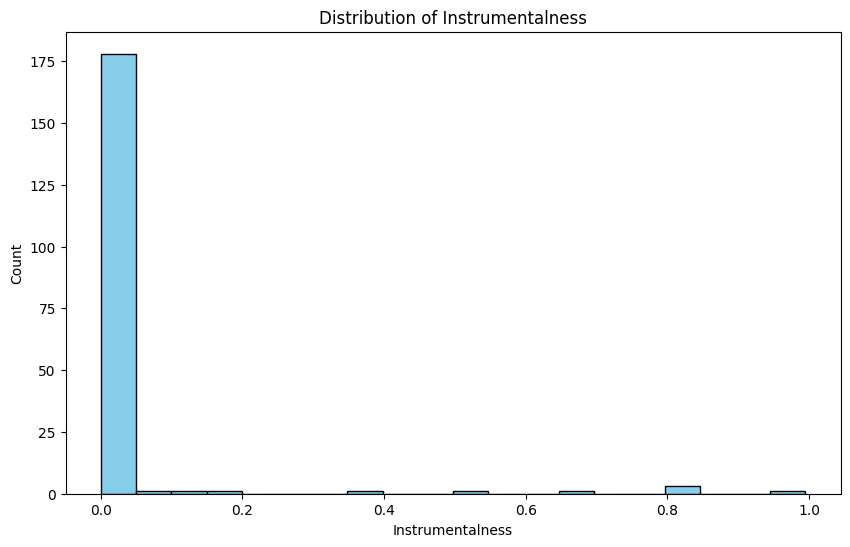

In [42]:
# Distribution plot for instrumentalness
df = spotify.copy()

plt.figure(figsize=(10, 6))
plt.hist(df['instrumentalness'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Count')
plt.show()


In [44]:
# Drop values above 0.4
spotify = spotify[spotify['instrumentalness'] <= 0.4]
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_sec
3886,67IvfvAMYQzJEeHopvwMMW,Pharoahe Monch,Simon Says,Simon Says,0.64,173159.0,1,0.664,0.916,1,-3.888,1,0.473,0.170,0.000017,0.1640,0.559,93.134,4,alternative,2.885983,173.159
8328,2AxCeJ6PSsBYiTckM0HLY7,Jimi Hendrix,Electric Ladyland,Voodoo Child (Slight Return),0.68,313373.0,0,0.214,0.910,8,-6.662,1,0.389,0.477,0.008330,0.0517,0.448,175.549,4,blues,5.222883,313.373
14930,7es56D0QedGMsK39wl2yFX,ASTN,Happier Than Ever,Happier Than Ever,0.76,109325.0,1,0.667,0.457,6,-6.885,0,0.439,0.341,0.000000,0.1140,0.266,97.604,4,chill,1.822083,109.325
14941,2xhGZ3WzOa3tir28y7Cb88,Peachy!;mxmtoon,Falling for U,Falling for U,0.74,124000.0,0,0.719,0.360,6,-12.034,1,0.398,0.748,0.000002,0.0812,0.409,80.184,4,chill,2.066667,124.000
14967,3VOgOT6SNjrRjhjuisphY7,untrusted;pretence;11:11 Music Group,"eyes blue or brown, can't remember","eyes blue or brown, can't remember",0.66,180833.0,0,0.751,0.354,10,-14.518,1,0.446,0.885,0.179000,0.2060,0.781,143.870,4,chill,3.013883,180.833


In [45]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 3886 to 109336
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_id          182 non-null    object  
 1   artists           182 non-null    object  
 2   album_name        182 non-null    object  
 3   track_name        182 non-null    object  
 4   popularity        182 non-null    float64 
 5   duration_ms       182 non-null    float64 
 6   explicit          182 non-null    category
 7   danceability      182 non-null    float64 
 8   energy            182 non-null    float64 
 9   key               182 non-null    int64   
 10  loudness          182 non-null    float64 
 11  mode              182 non-null    int64   
 12  speechiness       182 non-null    float64 
 13  acousticness      182 non-null    float64 
 14  instrumentalness  182 non-null    float64 
 15  liveness          182 non-null    float64 
 16  valence           18

## Genre

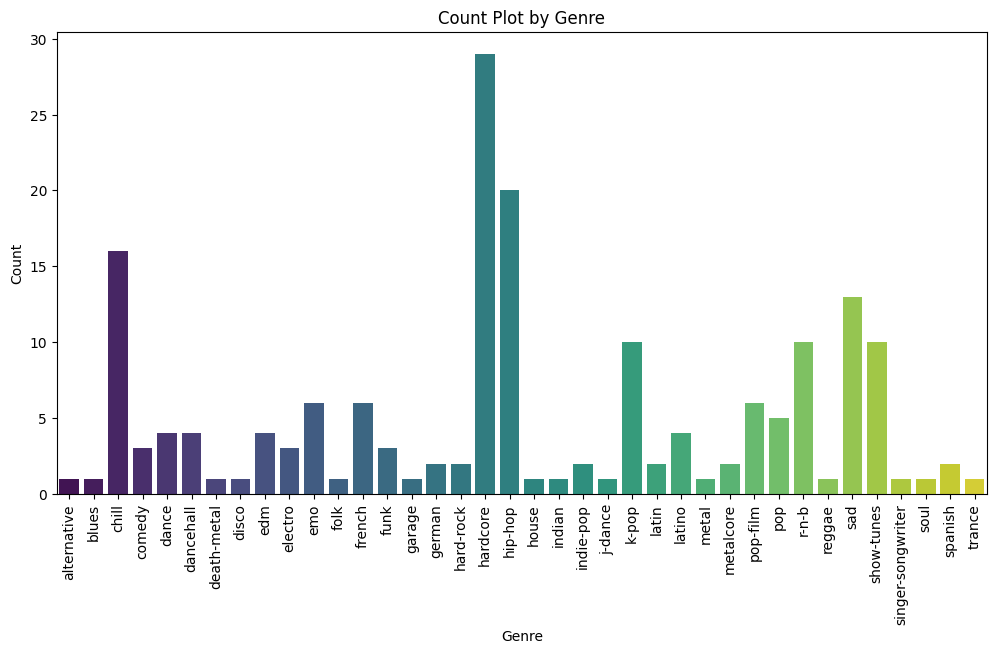

In [46]:
# Count plot by genre
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=spotify, x='track_genre', palette='viridis')
plt.title('Count Plot by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [54]:
# Drop specific genres
genres_to_drop = ['comedy', 'metal', 'metalcore', 'hardcore', 'german', 'garage', 'death-metal', 'hard-rock', 'show-tunes', 'blues', 'alternative', 'folk', 'french', 'hip-hop']
spotify = spotify[~spotify['track_genre'].isin(genres_to_drop)]
spotify.head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,duration_sec
14930,7es56D0QedGMsK39wl2yFX,ASTN,Happier Than Ever,Happier Than Ever,0.76,109325.0,1,0.667,0.457,6,-6.885,0,0.439,0.341,0.000000,0.1140,0.266,97.604,4,chill,1.822083,109.325
14941,2xhGZ3WzOa3tir28y7Cb88,Peachy!;mxmtoon,Falling for U,Falling for U,0.74,124000.0,0,0.719,0.360,6,-12.034,1,0.398,0.748,0.000002,0.0812,0.409,80.184,4,chill,2.066667,124.000
14967,3VOgOT6SNjrRjhjuisphY7,untrusted;pretence;11:11 Music Group,"eyes blue or brown, can't remember","eyes blue or brown, can't remember",0.66,180833.0,0,0.751,0.354,10,-14.518,1,0.446,0.885,0.179000,0.2060,0.781,143.870,4,chill,3.013883,180.833
14997,6kD7n19O9VEYQwENniEvPi,Kochetkovv,4:44 AM,4:44 AM,0.67,121965.0,0,0.809,0.282,0,-10.038,1,0.433,0.975,0.001760,0.2020,0.778,129.890,4,chill,2.032750,121.965
15023,19mM8MZLnS27poKhi2vDhn,SwitchOTR,"Coming for You (feat. Loski, Bandokay & Izzpot...",Coming for You - Freestyle,0.66,70285.0,1,0.898,0.303,6,-6.680,1,0.403,0.219,0.000962,0.0633,0.680,140.230,4,chill,1.171417,70.285
15204,7dbyaRWWFvB9UG2vcwTd3J,Sainte,Local Mvp,Champagne Shots,0.71,144000.0,0,0.942,0.441,11,-11.448,1,0.469,0.493,0.000000,0.1380,0.925,135.028,4,chill,2.400000,144.000
15210,4Fmr4dbY1sZiX77ZbljNFC,Canking;Ess2Mad,lemme land?,lemme land?,0.69,146878.0,0,0.875,0.593,7,-10.261,0,0.394,0.136,0.000000,0.1040,0.466,144.028,4,chill,2.447967,146.878
15258,1QwuUvd5IEsyLrB47jEOpB,KAVO,F My Ex,F My Ex,0.60,164595.0,1,0.894,0.435,11,-10.470,0,0.417,0.148,0.000000,0.0736,0.717,140.020,4,chill,2.743250,164.595
15304,3Kim4tV3HTnpaELmIh56lI,JBee,Talking Stage,Talking Stage,0.66,177464.0,1,0.838,0.454,11,-10.074,0,0.350,0.734,0.000000,0.1020,0.760,142.114,4,chill,2.957733,177.464
15504,6pe4kkc27IKSkubhLY7a5C,JBee,24's,24's,0.66,166027.0,1,0.540,0.538,7,-10.838,0,0.389,0.329,0.000000,0.1060,0.607,97.542,5,chill,2.767117,166.027


In [55]:
# Show current spotify info
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 14930 to 109336
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_id          102 non-null    object  
 1   artists           102 non-null    object  
 2   album_name        102 non-null    object  
 3   track_name        102 non-null    object  
 4   popularity        102 non-null    float64 
 5   duration_ms       102 non-null    float64 
 6   explicit          102 non-null    category
 7   danceability      102 non-null    float64 
 8   energy            102 non-null    float64 
 9   key               102 non-null    int64   
 10  loudness          102 non-null    float64 
 11  mode              102 non-null    int64   
 12  speechiness       102 non-null    float64 
 13  acousticness      102 non-null    float64 
 14  instrumentalness  102 non-null    float64 
 15  liveness          102 non-null    float64 
 16  valence           1